# EDA for Wild Life Import Export Data

- exploratory data analysis on LEMIS wild life import and export data from 2019 to 2020Q2, except 2019Q4

## <font color='#C46A40'>0. import libraries <font>

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px

## <font color='#C46A40'> 1. import dataset <font>

In [6]:
df_201901 = pd.read_excel('data/DecDetail/2019Q1.xlsx')
df_2019Q2 = pd.read_excel('data/DecDetail/2019Q2.xlsx')
df_2019Q3 = pd.read_excel('data/DecDetail/2019Q3.xlsx')
df_2020Q1 = pd.read_excel('data/DecDetail/2020Q1.xlsx')
df_2020Q2 = pd.read_excel('data/DecDetail/2020Q2.xlsx')

In [40]:
dfn = [df_201901, df_2019Q2, df_2019Q3, df_2020Q1, df_2020Q2]

df_comb = pd.concat(dfn, axis=0).reset_index(drop=True)
df_comb.sample(5)

Control\nNumber Species\nCode          Genus           Species  \
274585       2019588817          MATF  TROPICAL FISH     (MARINE SPP.)   
131212       2019530851          CRUS            NaN               NaN   
456274       2020720602          ALLM      ALLIGATOR  MISSISSIPPIENSIS   
372407       2020683216          ACSQ       ACROPORA         MILLEPORA   
188495       2019554664          HOBU     HOMALOPSIS           BUCCATA   

       Subspecies   Specific\nName Generic\nName Wildlf\nDesc Wildlf\nCat  \
274585        NaN              NaN           NaN          LIV         TFS   
131212        NaN  CRABS,LOBSTERS,   CRUSTACEANS          LIV         CRS   
456274        NaN         AMERICAN     ALLIGATOR          LPS         REP   
372407        NaN         STAGHORN         CORAL          LIV         COR   
188495        NaN     MASKED WATER         SNAKE          SHO         REP   

        Cartons  ...  Purp Src  Trans Mode Act Dp\nCd           Disp\nDate  \
274585     24.0  ...     T   W           A   C      C  2019-07-29 00:00:00   
131212     13.0  ...     T   C           A   C      C  2019-04-13 00:00:00   
456274      9.0  ...     T   W           A   C      C  2020-03-10 00:00:00   
372407     40.0  ...     T   W           A   C      C  2020-01-03 00:00:00   
188495      3.0  ...     T   C           A   C      C  2019-05-30 00:00:00   

       Ship\nDate I\nE Pt\nCd FSR First Name  
274585 2019-07-29    I     NY         EDWARD  
131212 2019-04-13    I     LA            NaN  
456274 2020-03-04    I     NW            NaN  
372407 2020-01-03    I     LA            NaN  
188495 2019-05-22    I     AG            NaN  

[5 rows x 25 columns]

In [41]:
print('There are {} features and {} records in this dataset'.format(df_comb.shape[1],
                                                                    df_comb.shape[0]))

There are 25 features and 529682 records in this dataset


## <font color='#C46A40'> 2. review feature list and datatypes, drop duplicate rows <font>

### <font color='#4f86f7'> 2.1 feature review <font>

In [42]:
for df in dfn:
    print('\n')
    print (list(df.columns))



['Control\nNumber', 'Species\nCode', 'Genus', 'Species', 'Subspecies', 'Specific\nName', 'Generic\nName', 'Wildlf\nDesc', 'Wildlf\nCat', 'Cartons', 'Qty', 'Unit', 'Value', 'Ctry\nOrg', 'Ctry\nIE', 'Purp', 'Src', 'Trans Mode', 'Act', 'Dp\nCd', 'Disp\nDate', 'Ship\nDate', 'I\nE', 'Pt\nCd']


['Control\nNumber', 'Species\nCode', 'Genus', 'Species', 'Subspecies', 'Specific\nName', 'Generic\nName', 'Wildlf\nDesc', 'Wildlf\nCat', 'Cartons', 'Qty', 'Unit', 'Value', 'Ctry\nOrg', 'Ctry\nIE', 'Purp', 'Src', 'Trans Mode', 'Act', 'Dp\nCd', 'Disp\nDate', 'Ship\nDate', 'I\nE', 'Pt\nCd']


['Control\nNumber', 'Species\nCode', 'Genus', 'Species', 'Subspecies', 'Specific\nName', 'Generic\nName', 'Wildlf\nDesc', 'Wildlf\nCat', 'Cartons', 'Qty', 'Unit', 'Value', 'Ctry\nOrg', 'Ctry\nIE', 'Purp', 'Src', 'Trans Mode', 'Act', 'Dp\nCd', 'Disp\nDate', 'Ship\nDate', 'I\nE', 'Pt\nCd', 'FSR First Name']


['Control\nNumber', 'Species\nCode', 'Genus', 'Species', 'Subspecies', 'Specific\nName', 'Generic\nName', '

In [43]:
# FSR first name is only available for df_2019Q3, remove
df_comb.drop(columns='FSR First Name', inplace=True) 
print('now there are {} columns'.format(len(df_comb.columns)))

now there are 24 columns


In [44]:
# update column names
df_comb.columns = df_comb.columns.str.replace('\n', ' ')
df_comb.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529682 entries, 0 to 529681
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Control Number  529682 non-null  int64         
 1   Species Code    529682 non-null  object        
 2   Genus           513863 non-null  object        
 3   Species         494667 non-null  object        
 4   Subspecies      17875 non-null   object        
 5   Specific Name   406065 non-null  object        
 6   Generic Name    503466 non-null  object        
 7   Wildlf Desc     529682 non-null  object        
 8   Wildlf Cat      529042 non-null  object        
 9   Cartons         511235 non-null  float64       
 10  Qty             529682 non-null  float64       
 11  Unit            529682 non-null  object        
 12  Value           529682 non-null  int64         
 13  Ctry Org        525068 non-null  object        
 14  Ctry IE         524309 non-null  obj

### <font color='#4f86f7'> 2.2 row review <font>

In [50]:
# check for duplicate rows
duplicated_df = df_comb[df_comb.duplicated(keep='first')]
print('number of duplicated rows: {}'.format(duplicated_df.shape[0]))

number of duplicated rows: 20270


In [46]:
duplicated_df.head()

Control Number Species Code           Genus      Species Subspecies  \
8        2018470820         NHOL       NYMPHICUS  HOLLANDICUS        NaN   
58       2018474368         NONI  NONCITES ENTRY          NaN        NaN   
59       2018474368         NONI  NONCITES ENTRY          NaN        NaN   
60       2018474368         NONI  NONCITES ENTRY          NaN        NaN   
193      2018476223         ATCC    ANTHOCIDARIS  CRASSISPINA        NaN   

    Specific Name Generic Name Wildlf Desc Wildlf Cat  Cartons  ...  Ctry IE  \
8             NaN    COCKATIEL         LIV        OBR      3.0  ...       CA   
58            NaN      INSECTS         WNG        APD      1.0  ...       NL   
59            NaN      INSECTS         WNG        APD      1.0  ...       NL   
60            NaN      INSECTS         WNG        APD      1.0  ...       NL   
193           SEA       URCHIN         MEA        OIV     10.0  ...       SG   

    Purp  Src Trans Mode Act Dp Cd            Disp Date  Ship Date I E Pt Cd  
8      P    C          V   C     C  2018-12-19 00:00:00 2019-01-02   I    PH  
58     T    W          A   C     C  2018-12-26 00:00:00 2019-01-07   E    NY  
59     T    W          A   C     C  2018-12-26 00:00:00 2019-01-07   E    NY  
60     T    W          A   C     C  2018-12-26 00:00:00 2019-01-07   E    NY  
193    T    W          O   C     C  2018-12-31 00:00:00 2019-01-02   I    LA  

[5 rows x 24 columns]

In [37]:
# drop duplicated rows
df_comb.drop_duplicates(inplace=True, ignore_index=True)

In [38]:
duplicated_df = df_comb[df_comb.duplicated(keep='first')]
print('number of duplicated rows: {}'.format(duplicated_df.shape[0]))

number of duplicated rows: 0


## <font color='#C46A40'> 3. features deep dive <font>    

### <font color='#4f86f7'> 3.1 understanding features - a rough breakdown(not including unit values) <font>

**item identification** by shipper
- description_value (wild life)
- species_code                 
- genus   
- species
- sub_species
- specific_name 
- generic_name 
- purpose_value 
- source_value 
     - source of the specimen (ex. wild, ranch, captivity etc)

**shipment information**
- country_origin_value (origin of shipment)
- country_import_export_value (importer vs. exporter from us perspective)
- import_export (US perspective)
- port_value (shipping port)
- transport_mode_value
- us_co (company in the US)


**time stamps**
- shipment_date
- disposition_date


**outcome**
- action_value
    - cleared, refused
      
- disposition_value 
    - abandoned, cleared, re-export, seized

In [9]:
# create new df for feature deep dive, excluding unit columns
measurement_cols = ['centimeters', 'cubic_centimeters', 'cubic_meters', 'grams', 'kilograms', 
                      'liters', 'meters', 'milligrams', 'milliliters', 'number_of_specimens', 
                      'square_centimeter', 'square_meters', 'unknown_unit_value']

# drop measurement columns for initial analysis
info_df = raw_df.drop(columns=measurement_cols)
info_df.head()

species_code    genus  species          sub_species          specific_name  \
0         AAA?  ASTRAEA  SPECIES  unknown_sub_species  unknown_specific_name   
1         AAA?  ASTRAEA  SPECIES  unknown_sub_species  unknown_specific_name   
2         AAA?  ASTRAEA  SPECIES  unknown_sub_species  unknown_specific_name   
3         AAA?  ASTRAEA  SPECIES  unknown_sub_species  unknown_specific_name   
4         AAA?  ASTRAEA  SPECIES  unknown_sub_species  unknown_specific_name   

  generic_name disposition_date shipment_date import_export  \
0        SHELL       2005-01-13    2005-01-05             I   
1        SHELL       2005-01-18    2005-01-18             E   
2        SHELL       2005-01-26    2005-01-12             I   
3        SHELL       2005-01-26    2005-01-17             I   
4        SHELL       2005-02-15    2005-02-15             E   

           transport_mode_value                          us_co action_value  \
0  unknown_transport_mode_value                VIRGELLE'S INC.      Cleared   
1              Personal vehicle  SEACARE MARICULTURED PRODUCTS      Cleared   
2  unknown_transport_mode_value                       TIDELINE      Cleared   
3  unknown_transport_mode_value                        JKW LLC      Cleared   
4              Personal vehicle  SEACARE MARICULTURED PRODUCTS      Cleared   

                         description_value disposition_value   port_value  \
0        Shell product (mollusc or turtle)           Cleared  Los Angeles   
1  Live specimens (live animals or plants)           Cleared     Region 1   
2         Shell (mollusc, raw or unworked)           Cleared  Los Angeles   
3       Jewelry (other than ivory jewelry)           Cleared     Honolulu   
4  Live specimens (live animals or plants)           Cleared        Sumas   

  purpose_value                   source_value country_origin_value  \
0    Commercial  Specimens taken from the wild          Philippines   
1    Commercial  Specimens taken from the wild        United States   
2    Commercial  Specimens taken from the wild          Philippines   
3    Commercial  Specimens taken from the wild          Philippines   
4    Commercial  Specimens taken from the wild        United States   

  country_import_export_value  
0                 Philippines  
1                      Canada  
2                 Philippines  
3                 Philippines  
4                      Canada

In [10]:
# check export count vs. origin US count 
export_count = len(info_df[info_df['import_export']=='E'])
us_origin_count = len(info_df[info_df['country_origin_value']=='United States'])

print('there are {:,} exports based on export count, there are {:,} US counts'.format(export_count, us_origin_count)
     )

there are 1,084,836 exports based on export count, there are 688,506 US counts


In [11]:
import_df = info_df[info_df['import_export']=='E']

### <font color='#4f86f7'> 3.2 outcome variables
- action_value
- disposition_value

#### 3.2.1 action value record comparsion (cleared vs. refused)

In [12]:
# break down the counts for clear vs. refused
outcome_counts = info_df['action_value'].value_counts().rename_axis('action').reset_index(name='counts')

# visualize with bar chart
fig = px.bar(outcome_counts, x='action', y='counts', title='cleared vs. refused')
fig.show()

> looks like we have an inbalanced dataset:
> - **~5,500,000** cleared
> - **~102,000** refused
>
>roughly 50x difference

#### 3.2.1 refused shipment disposition values breakdown

In [13]:
# closer look at just refused shipments
refused_df = info_df[info_df['disposition_value']!='Cleared']

# break down the counts by refused reason
refused_counts = refused_df['disposition_value'].value_counts().rename_axis('disposition').reset_index(name='counts')
print(refused_counts)

# visualize with bar chart
fig = px.bar(refused_counts, x='disposition', y='counts', title='refused shipments')
fig.show()

                 disposition  counts
0                     Seized   54880
1                   Reexport   26512
2                  Abandoned   18400
3  unknown_disposition_value      77


> Of the refused shipments in this dataset, 
> - about **1/2** are seized
> - about **1/4** are reexported

### <font color='#4f86f7'> 3.4 timeline variables
- shipment_date
- disposition_date

#### 3.4.1 date time conversions of shipment_date and disposition_date

In [14]:
# change the datatype of date time fields
info_df['shipment_date'] = pd.to_datetime(info_df['shipment_date'])
info_df['disposition_date'] = pd.to_datetime(info_df['disposition_date'])

# add a shipping year and month column
info_df['shipment_year'] = info_df['shipment_date'].dt.year
info_df['shipment_month'] = info_df['shipment_date'].dt.month

info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5569636 entries, 0 to 5569635
Data columns (total 21 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   species_code                 object        
 1   genus                        object        
 2   species                      object        
 3   sub_species                  object        
 4   specific_name                object        
 5   generic_name                 object        
 6   disposition_date             datetime64[ns]
 7   shipment_date                datetime64[ns]
 8   import_export                object        
 9   transport_mode_value         object        
 10  us_co                        object        
 11  action_value                 object        
 12  description_value            object        
 13  disposition_value            object        
 14  port_value                   object        
 15  purpose_value                object        
 16  

#### 3.4.2 shipment date analysis - all shipments

In [15]:
# check on shipment volumn per year in dataset
shipment_year_groups = info_df.groupby(['shipment_year'])
shipment_year_groups.size()

shipment_year
2005    473793
2006    487942
2007    507684
2008    512886
2009    476929
2010    477625
2011    492618
2012    513898
2013    525599
2014    527804
2015    501066
2016     71792
dtype: int64

In [16]:
# visualize volume over each year
for year, year_records in shipment_year_groups:
    
    daily_counts = year_records['shipment_date'].value_counts().rename_axis('shipment_date').reset_index(name='counts')
    daily_counts = daily_counts.sort_values(by='shipment_date')
    
    fig = px.line(daily_counts,x='shipment_date', y='counts',  title='{} Total Shipments'.format(year))
    fig.show()

#### 3.4.2 shipment date analysis - refused shipments

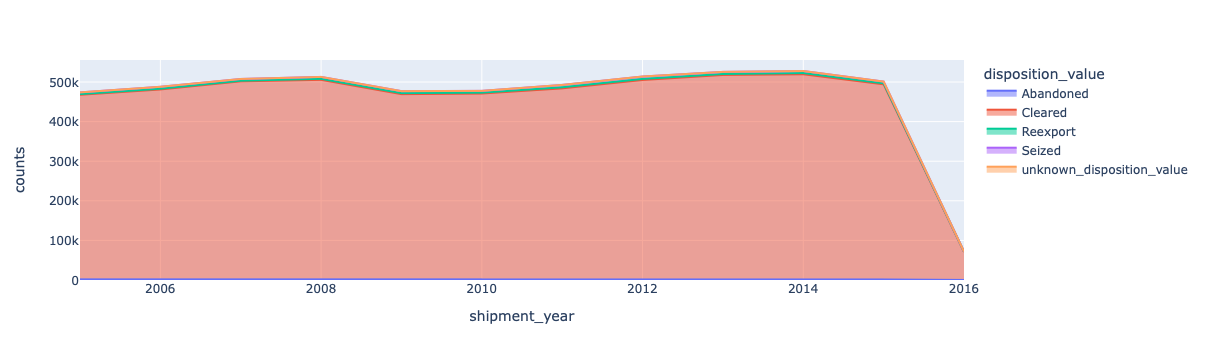

In [17]:
# check shipment volume per year per disposition value in dataset
shipment_year_reason_groups = info_df.groupby(['shipment_year', 'disposition_value'])
test_df = shipment_year_reason_groups.size().reset_index(name='counts')

fig = px.area(test_df,x='shipment_year', y='counts', color='disposition_value', line_group='disposition_value')
fig.show()

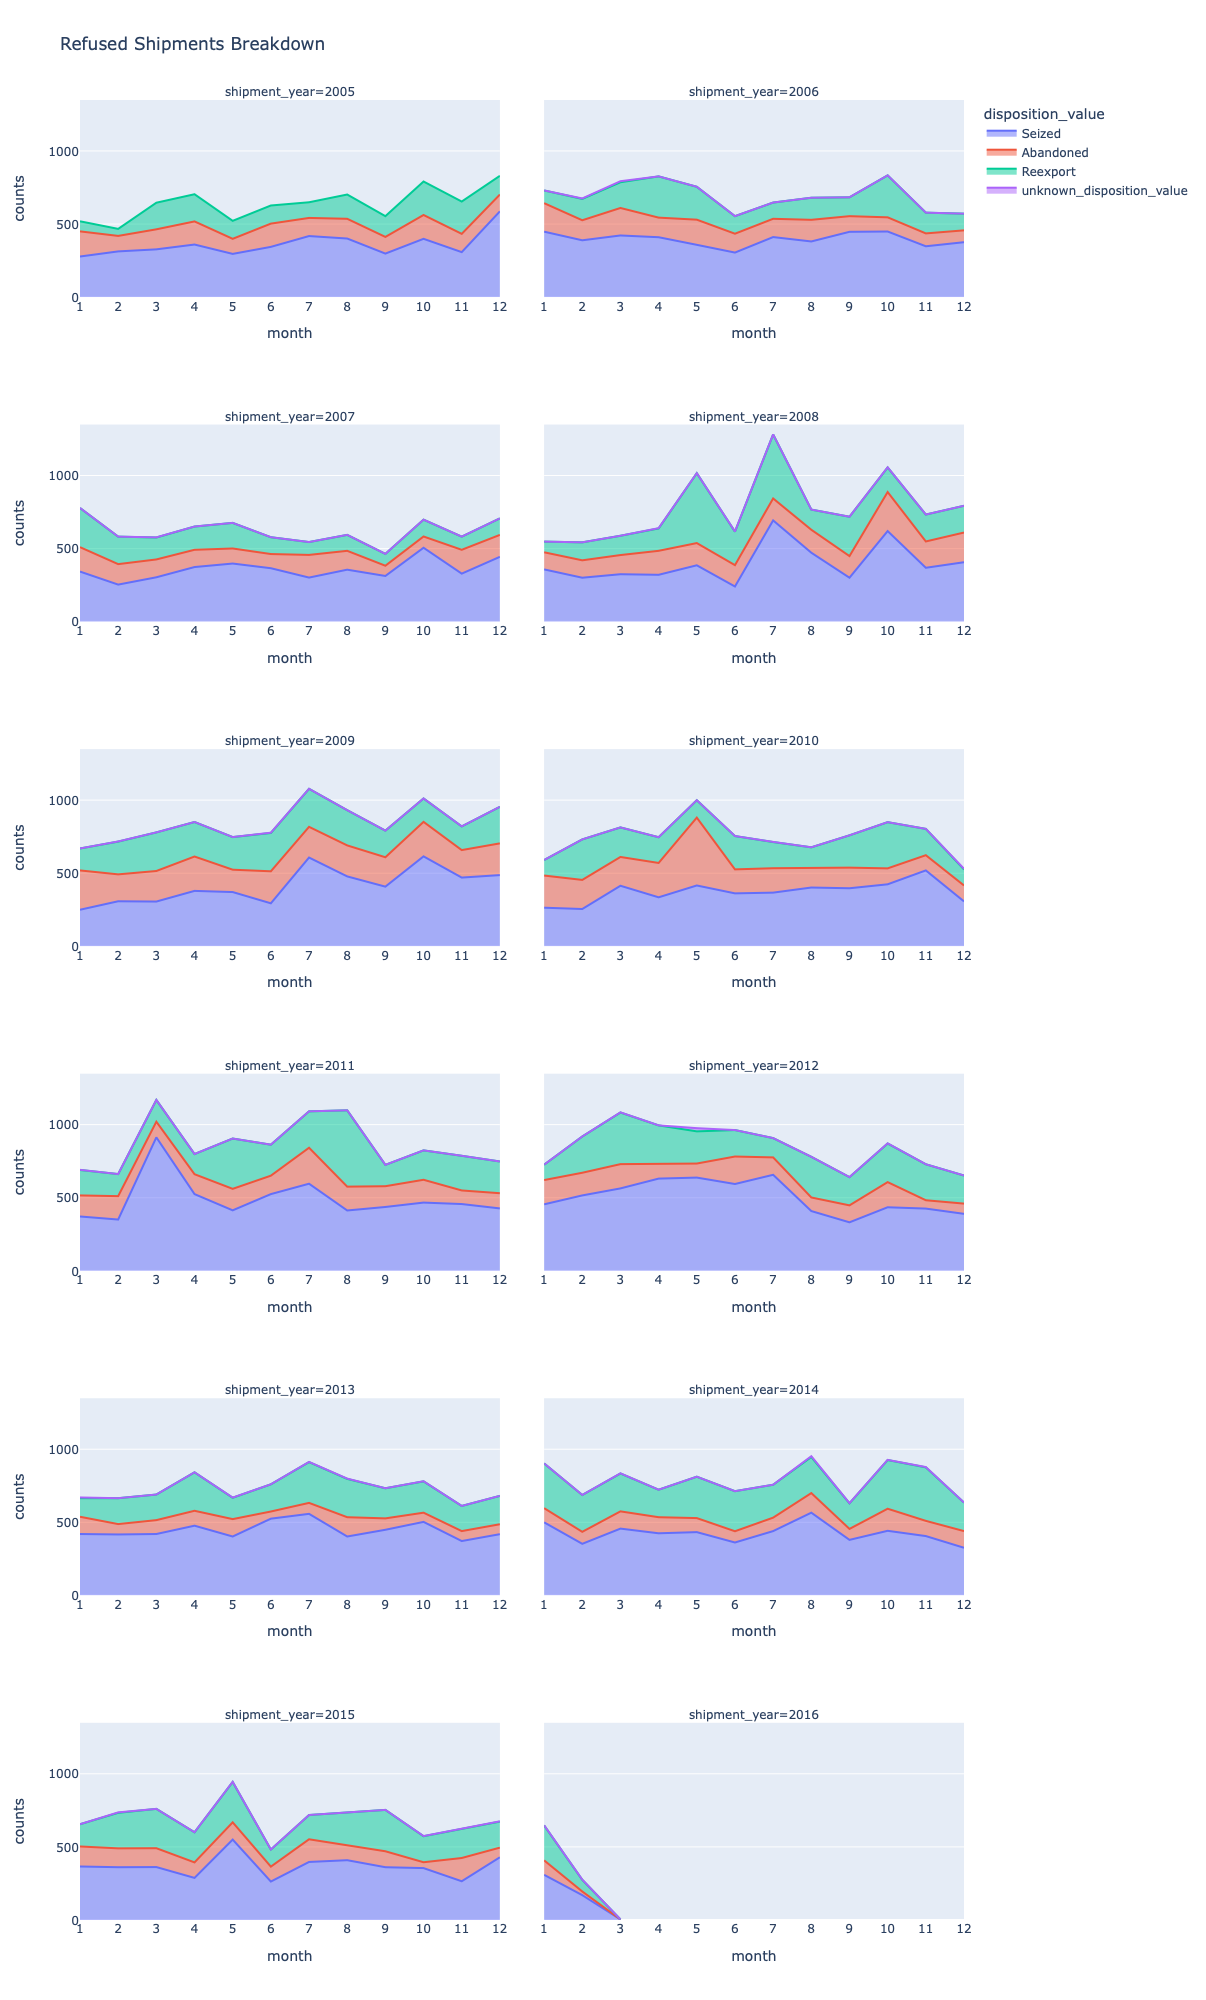

In [18]:
# check shipment volume per month per disposition value in dataset
disposition_df = info_df[info_df['disposition_value']!='Cleared']
monthly_counts = disposition_df[['shipment_year','shipment_month', 'disposition_value']].value_counts().reset_index(name='counts')
monthly_counts = monthly_counts.sort_values(by=['shipment_year','shipment_month'])

fig = px.area(monthly_counts,
              x='shipment_month', 
              y='counts', 
              color='disposition_value',
              facet_col='shipment_year',
              facet_col_wrap=2,
              facet_col_spacing=0.05, 
              title='Refused Shipments Breakdown',
              height=2000
             )

fig.update_xaxes(showticklabels=True)
fig.update_xaxes(dtick=1)
fig.update_xaxes(showgrid=False) 
fig.update_xaxes(title_text='month')
#fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.show()

###  <font color='#4f86f7'> 3.5 shipment variables
- country_origin_value (origin of shipment)
- country_import_export_value (destination of shipment)
- import_export (US perspective)
- port_value (shipping port)
- transport_mode_value
- us_co (company in the US)

#### 3.5.1 refused shipment origins and destinations

In [19]:
def disposition_origin_countries(disp_reason='Seized', show_top_countries=15):
    
    disp_reason = disp_reason
    reason_df = info_df[info_df['disposition_value']==disp_reason]

    # count shipment per country
    country_counts = reason_df['country_origin_value'].value_counts().rename_axis('country_origin').reset_index(name='counts')

    # visualize proportional breakdown via pie chart
    fig = px.pie(country_counts, values='counts', names='country_origin', title='{} Shipments Origin Country Breakdown'.format(disp_reason))
    fig.update_traces(textposition='inside')
    fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
    fig.show()

    # visualize selected top countries with bar chart
    top_number = show_top_countries 
    fig = px.bar(country_counts.head(top_number), x='counts', y='country_origin', 
                 title='Top {} Countries {} Shipments Comes From'.format(top_number, disp_reason), height=600)
    fig.update_layout(yaxis={'categoryorder':'total ascending'})
    fig.show()
    
    
def disposition_destination_countries(disp_reason='Seized', show_top_countries=15):
    
    disp_reason = disp_reason
    reason_df = info_df[info_df['disposition_value']==disp_reason]

    # count shipment per country
    country_counts = reason_df['country_import_export_value'].value_counts().rename_axis('country_destination').reset_index(name='counts')

    # visualize proportional breakdown via pie chart
    fig = px.pie(country_counts, values='counts', names='country_destination', title='{} Shipments Destination Country Breakdown'.format(disp_reason))
    fig.update_traces(textposition='inside')
    fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
    fig.show()

    # visualize selected top countries with bar chart
    top_number = show_top_countries 
    fig = px.bar(country_counts.head(top_number), x='counts', y='country_destination', 
                 title='Top {} Countries {} Shipments Shipped To'.format(top_number, disp_reason), height=600)
    fig.update_layout(yaxis={'categoryorder':'total ascending'})
    fig.show()

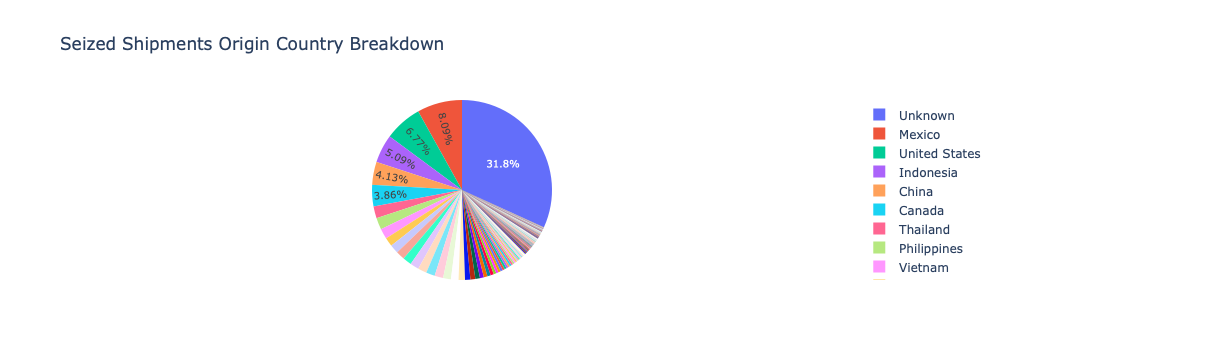

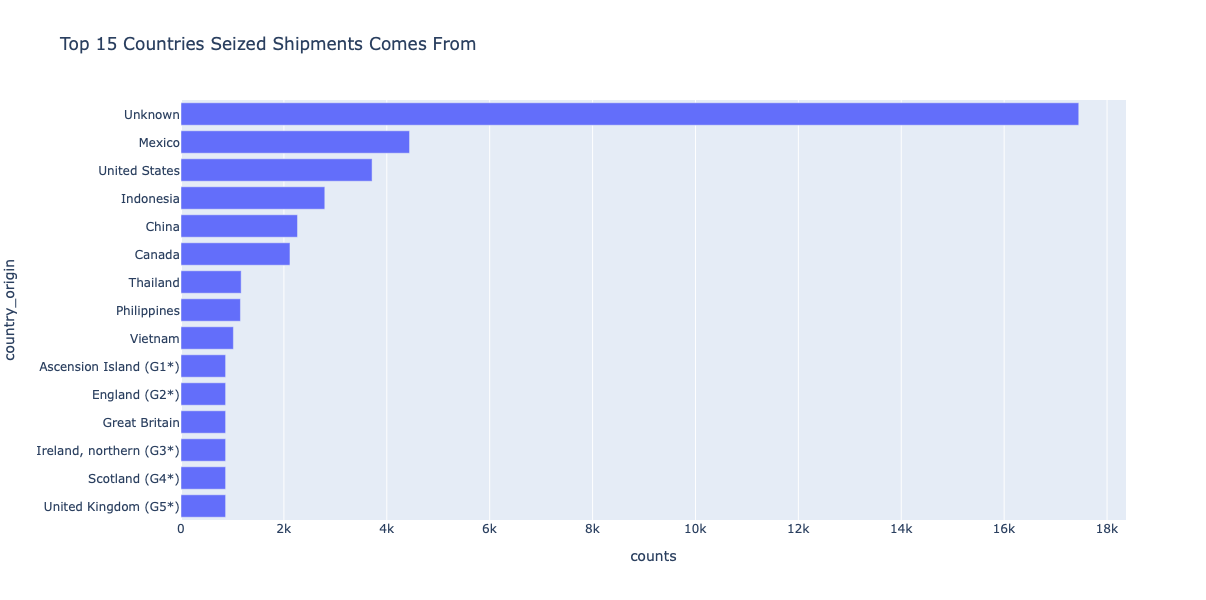

In [20]:
# choose disposition reason and top number of countries to show, default is 'Seized' and top 15. 
disposition_origin_countries()
#disposition_origin_countries('Abandoned', 20)

> ~32% of shipments seized were from unknown countries
> 
> 8% were from Mexico 
> 
> 5% were from the US

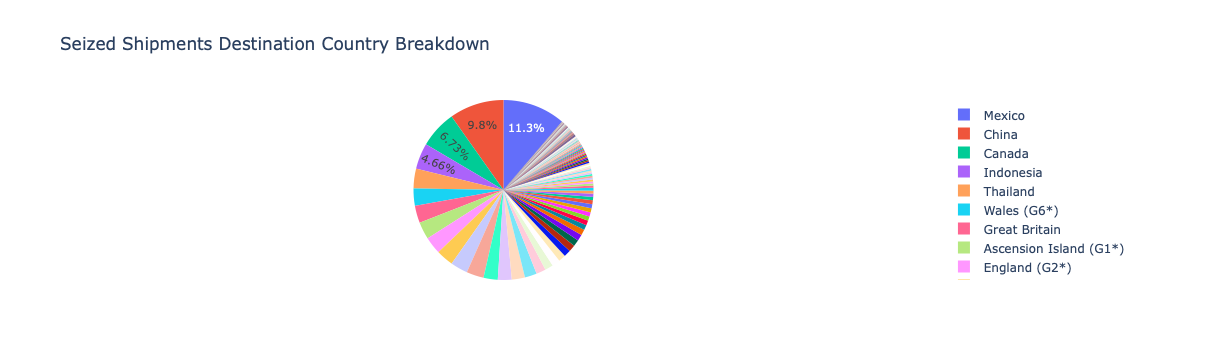

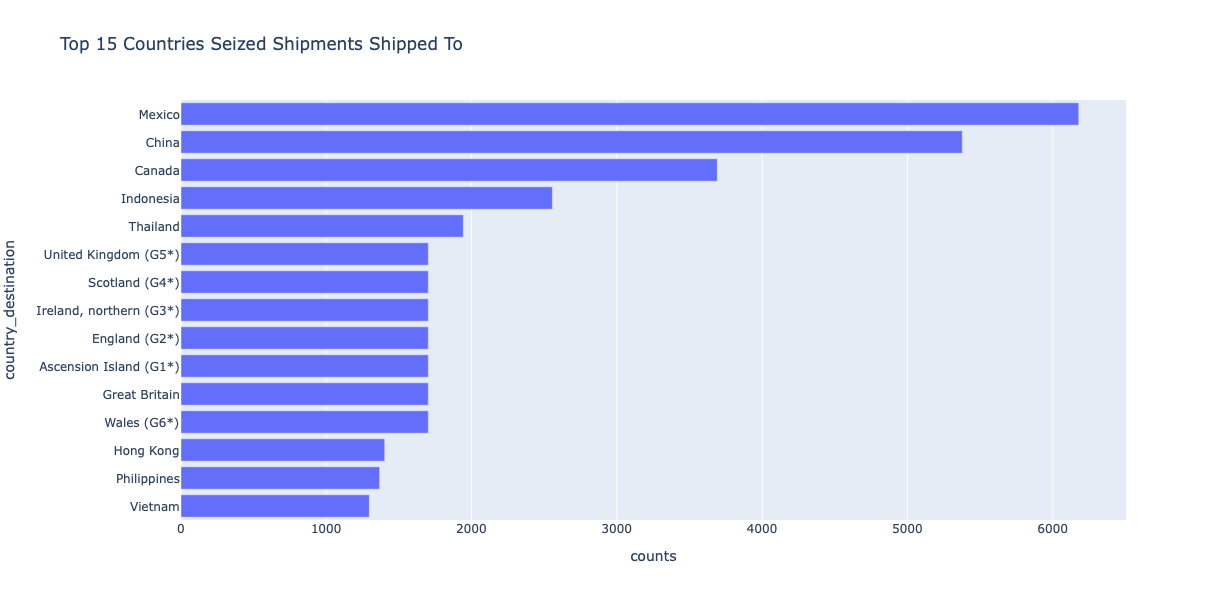

In [21]:
# choose disposition reason and top number of countries to show, default is 'Seized' and top 15. 
disposition_destination_countries()

#### 3.5.2 domestic vs. international trading countries, importers and exporters

In [22]:
# classify each trade as domestic vs. international 
info_df['domestic_trade'] = np.where(info_df['country_origin_value']==info_df['country_import_export_value'], 1, 0)
info_df['domestic_trade'].value_counts()

0    2962265
1    2607371
Name: domestic_trade, dtype: int64

> about **1/2** of the records in LEMIS are domestic trades within a country

In [23]:
domestic_countries = set(info_df[info_df['domestic_trade']==1]['country_origin_value'])
print('there are domestic trade records for {} countries\n'.format(len(domestic_countries)))

importers = set(info_df[info_df['domestic_trade']==0]['country_origin_value'])
exporters = set(info_df[info_df['domestic_trade']==0]['country_import_export_value'])
international_countries = importers.union(exporters)
print('there are international trade records for {} countries\n'.format(len(international_countries)))

domestic_only_countries = domestic_countries - international_countries
print('there are {} countries with only domestic records: {}\n'.format(len(domestic_only_countries), domestic_only_countries))

international_only_countries = international_countries - domestic_countries
print('there are {} countries with only internatinal records: {}'.format(len(international_only_countries), list(international_only_countries)))

there are domestic trade records for 224 countries

there are international trade records for 250 countries

there are 0 countries with only domestic records: set()

there are 26 countries with only internatinal records: ['Lesotho', 'Luxembourg', 'Mayotte', 'South Sudan', 'Montenegro', 'Pitcairn', 'Wallis & Futuna Islands', 'Somalia', 'Tuvalu', 'Norfolk Island', 'Saint Martin', 'South Georgia & Sandwich Islands', 'French Southern Territories', 'Western Sahara', 'Andorra', 'Bouvet Island', 'Saint Pierre & Miquelon', 'Holy See (Vatican City)', 'Guernsey', 'Liechtenstein', 'Heard Island & McDonald Islands', 'Jersey', 'Isle of Man', 'Niue', 'Aland Islands', 'San Marino']


> all countries in this dataset trade internationally
>
> not alll countries trade domestically, 26 are exclusively international, most of these are smaller islands

In [24]:
export_only = exporters - importers
print('there are {} countries with only exporting records: {}\n'.format(len(export_only), export_only))

import_only = importers - exporters
print('there are {} countries with only importing records: {}\n'.format(len(import_only), import_only))

hubs = importers & exporters
print('there are {} countries with both importing and exporting records. \n'.format(len(hubs)))

there are 3 countries with only exporting records: {'Sint Maarten', 'Bouvet Island', 'Guernsey'}

there are 3 countries with only importing records: {'Somalia', 'Svalbard & Jan Mayen Islands', 'South Sudan'}

there are 244 countries with both importing and exporting records. 



#### 3.5.3 country specific analysis

In [25]:
def find_all_trades(country):
     # find all trades related to selected country
    trades_df = info_df[(info_df['country_origin_value']==country)|(info_df['country_import_export_value']==country)]
    
    # domestic vs. international trading
    domestic_count = len(trades_df[trades_df['domestic_trade']==1])
    international_count = len(trades_df[trades_df['domestic_trade']==0])
    total = domestic_count + international_count
    
    print('{} has a total of {:,} trades in this dataset, {:,} domestic, {:,} international'.format(country,
                                                                                              total,
                                                                                              domestic_count,
                                                                                              international_count))
    return trades_df

def international_trades(trades_df, country):
 
    international_df = trades_df[trades_df['domestic_trade']==0]
    
    # check if there is any international trades
    if len(international_df)==0:
        return print('International trade analysis not applicable.')
    else:
        print('\n----------------- International trade analysis -----------------')
        
        # import and export volume
        import_df = international_df[international_df['country_import_export_value']==country]
        print('{} received {:,} shipments from other countries'.format(country, len(import_df)))
        
        export_df = international_df[international_df['country_origin_value']==country]
        print('{} shipped {:,} shipments to other countries'.format(country, len(export_df)))
        

        # analyze import shipment origins
        import_country_counts = import_df['country_origin_value'].value_counts().rename_axis('shipment origins').reset_index(name='counts')
        
        # visualize proportional breakdown via pie chart
        fig = px.pie(import_country_counts, values='counts', names='shipment origins', title="Shipment Sources to {}".format(country))
        fig.update_traces(textposition='inside')
        fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
        fig.show()

        # visualize selected top countries with bar chart
        top_number = 20
        fig = px.bar(import_country_counts.head(top_number), x='counts', y='shipment origins', 
                     title='Top {} Countries Shipping to {}'.format(top_number, country), height=600)
        fig.update_layout(yaxis={'categoryorder':'total ascending'})
        fig.show()
        
        
        # analyze export shipment
        export_country_counts = export_df['country_import_export_value'].value_counts().rename_axis('shipment dest').reset_index(name='counts')
        
        # visualize proportional breakdown via pie chart
        fig = px.pie(export_country_counts, values='counts', names='shipment dest', title="Shipments from {} are sent to".format(country))
        fig.update_traces(textposition='inside')
        fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
        fig.show()

        # visualize selected top countries with bar chart
        top_number = 20
        fig = px.bar(export_country_counts.head(top_number), x='counts', y='shipment dest', 
                     title='Top {} Countries Receiving Shipment from {} '.format(top_number, country), height=600)
        fig.update_layout(yaxis={'categoryorder':'total ascending'})
        fig.show()
        

def domestic_trades(trades_df, country):
 
    domestic_df = trades_df[trades_df['domestic_trade']==1]
    
    # check if there is any domestic trades
    if len(domestic_df)==0:
        return print('Domestic trade analysis not applicable.')
    else:
        # port breakdown, top ports
        port_counts_df = domestic_df['port_value'].value_counts().rename_axis('ports').reset_index(name='counts')
        
        # visualize proportional breakdown via pie chart
        fig = px.pie(port_counts_df, values='counts', names='ports', title='Domestic Trade Ports')
        fig.update_traces(textposition='inside')
        fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
        fig.show()

        # visualize selected ports with the most traffic with bar chart
        fig = px.bar(port_counts_df.head(20), x='counts', y='ports', 
                     title='Top 20 Ports with Most Frequent Trades', height=600)
        fig.update_layout(yaxis={'categoryorder':'total ascending'})
        fig.show()
        
    
def country_analysis(country):
       
    trades_df = find_all_trades(country)
    
    # international trade analysis
    international_trades(trades_df, country)
    
    # domestic trade analysis
    domestic_trades(trades_df, country)

Unknown has a total of 177,975 trades in this dataset, 55,820 domestic, 122,155 international

----------------- International trade analysis -----------------
Unknown received 2,346 shipments from other countries
Unknown shipped 119,809 shipments to other countries


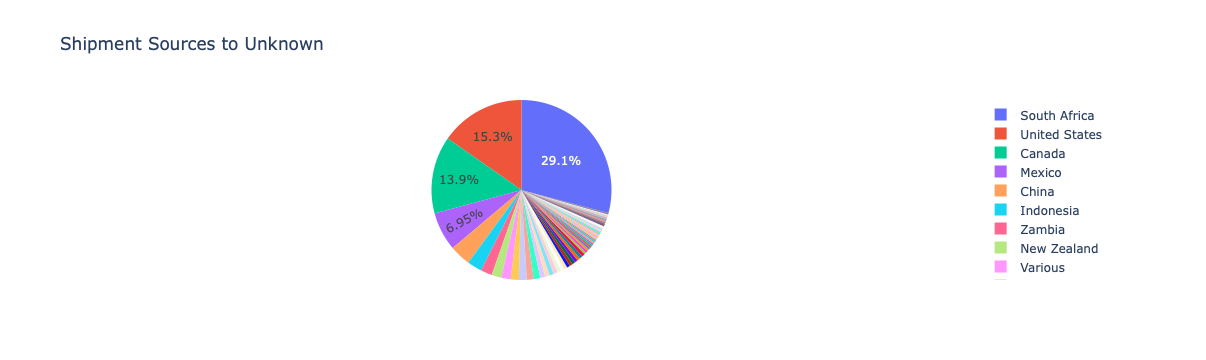

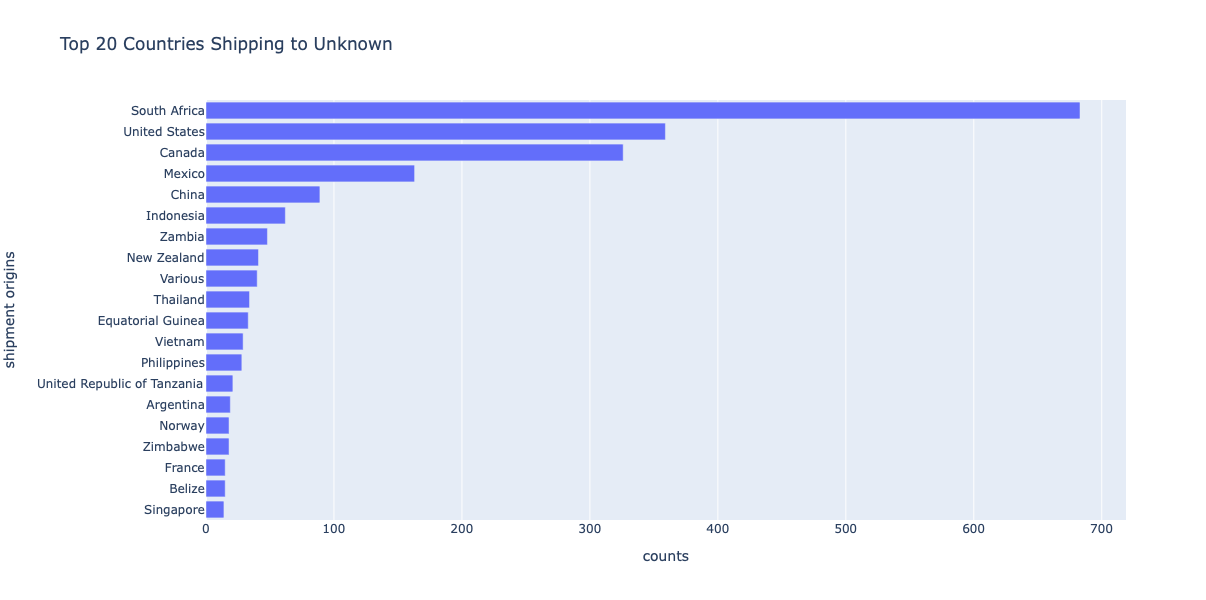

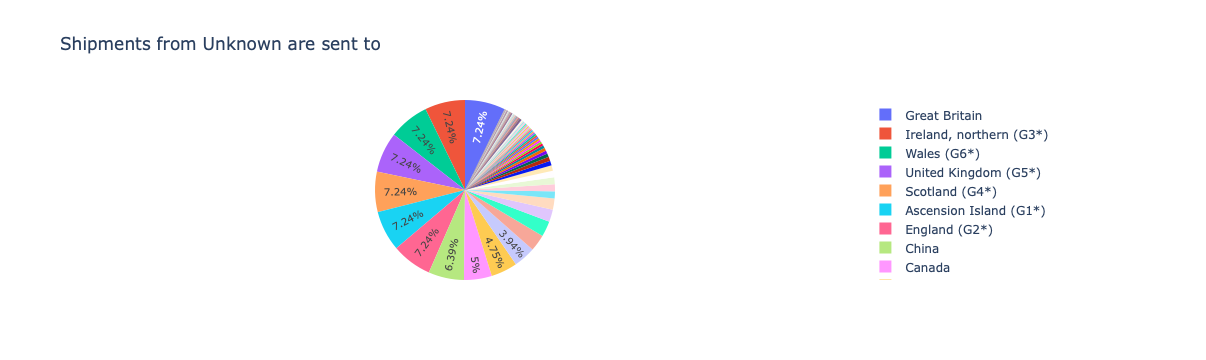

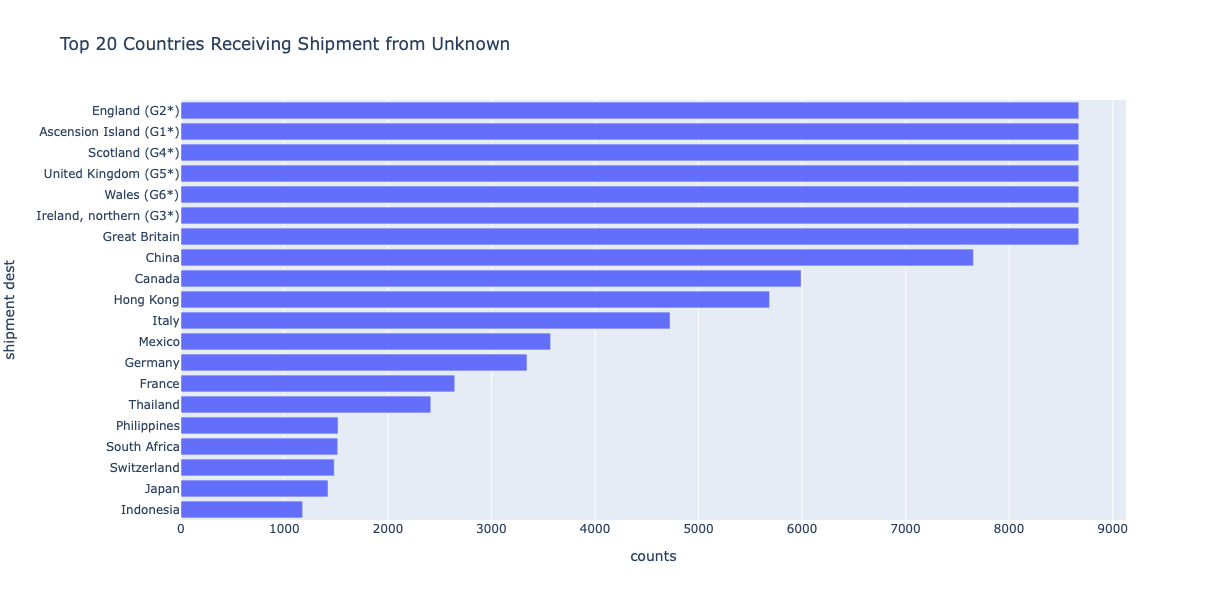

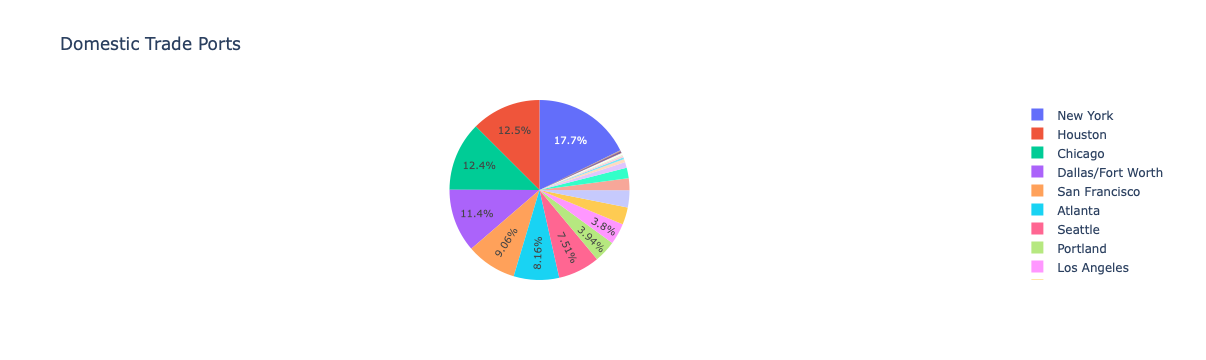

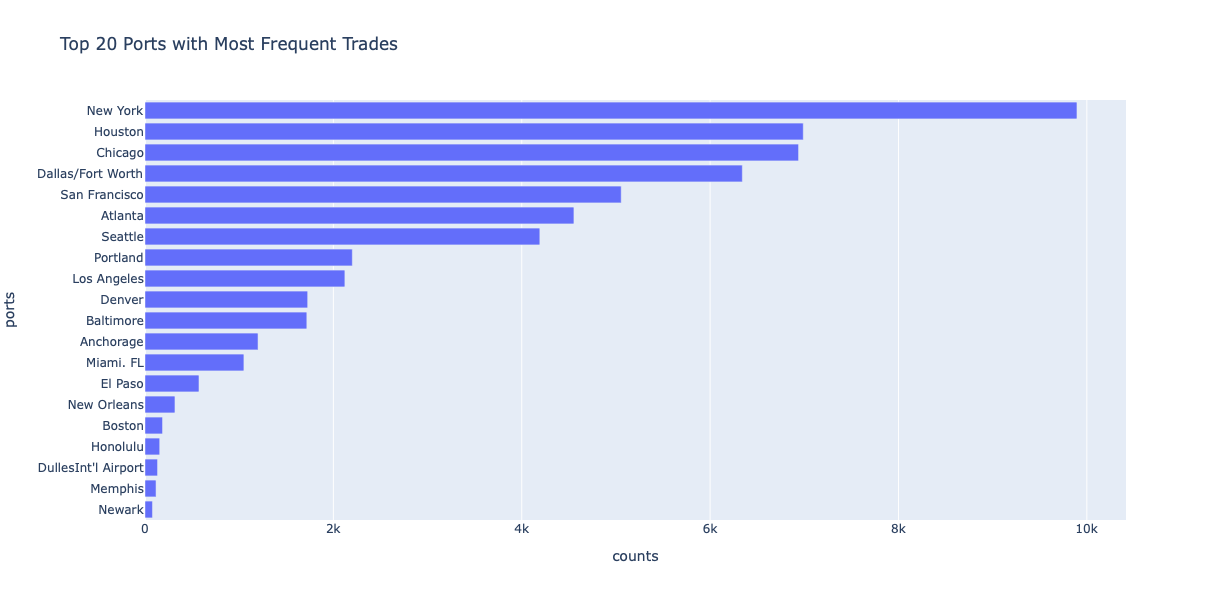

In [26]:
country_analysis('Unknown')

In [27]:
def test():
    country = 'Canada'
    trades_df = info_df[(info_df['country_origin_value']==country)|(info_df['country_import_export_value']==country)]
    
    domestic_df = trades_df[trades_df['domestic_trade']==1]
    
    
    
    return domestic_df

In [28]:
test()

species_code         genus      species          sub_species  \
261                      AABA      ACTINOTE        ABANA  unknown_sub_species   
1476                     AAC?   ANNACHLAMYS      SPECIES  unknown_sub_species   
3567                     AAE?        ACRAEA      SPECIES  unknown_sub_species   
3584                     AAE?        ACRAEA      SPECIES  unknown_sub_species   
3711                     AAER         ALCES   AMERICANUS  unknown_sub_species   
...                       ...           ...          ...                  ...   
5569202  unknown_species_code     ZEBRAMOSA     GEMMATUM  unknown_sub_species   
5569231  unknown_species_code       ZOARCES   AMERICANUS  unknown_sub_species   
5569251  unknown_species_code    ZOOPLAKTON    COMMUNITY  unknown_sub_species   
5569255  unknown_species_code  ZOOTERMOPSIS   NEVADENSIS  unknown_sub_species   
5569632  unknown_species_code       lepomis  MACROCHIRUS  unknown_sub_species   

                 specific_name          generic_name disposition_date  \
261      unknown_specific_name             BUTTERFLY       2011-12-21   
1476     unknown_specific_name                 SHELL       2011-06-10   
3567     unknown_specific_name             BUTTERFLY       2005-10-06   
3584     unknown_specific_name             BUTTERFLY       2007-08-03   
3711     unknown_specific_name                 MOOSE       2006-12-11   
...                        ...                   ...              ...   
5569202  unknown_specific_name  unknown_generic_name       2012-03-05   
5569231  unknown_specific_name  unknown_generic_name       2008-05-14   
5569251  unknown_specific_name  unknown_generic_name       2012-10-24   
5569255  unknown_specific_name  unknown_generic_name       2009-06-25   
5569632  unknown_specific_name  unknown_generic_name       2006-06-13   

        shipment_date import_export transport_mode_value  ...  \
261        2011-06-28             I     Personal vehicle  ...   
1476       2011-06-10             I     Personal vehicle  ...   
3567       2005-09-30             I            Air cargo  ...   
3584       2007-07-30             I     Personal vehicle  ...   
3711       2006-12-02             I     Personal vehicle  ...   
...               ...           ...                  ...  ...   
5569202    2012-03-05             I            Air cargo  ...   
5569231    2008-04-30             I            Air cargo  ...   
5569251    2012-10-24             I            Air cargo  ...   
5569255    2009-06-24             I            Air cargo  ...   
5569632    2006-06-13             I            Air cargo  ...   

                               description_value disposition_value  \
261         Trophy (all the parts of one animal)           Cleared   
1476            Shell (mollusc, raw or unworked)            Seized   
3567                  Dead animal (whole animal)           Cleared   
3584                  Dead animal (whole animal)           Cleared   
3711        Trophy (all the parts of one animal)           Cleared   
...                                          ...               ...   
5569202  Live specimens (live animals or plants)           Cleared   
5569231          Specimen (scientific or museum)           Cleared   
5569251          Specimen (scientific or museum)           Cleared   
5569255               Dead animal (whole animal)           Cleared   
5569632          Specimen (scientific or museum)           Cleared   

          port_value     purpose_value  \
261        Fairbanks        Scientific   
1476      Sweetgrass          Personal   
3567         Memphis          Personal   
3584      Sweetgrass        Scientific   
3711        Eastport  Hunting Trophies   
...              ...               ...   
5569202  Los Angeles        Commercial   
5569231      Memphis        Commercial   
5569251      Memphis        Scientific   
5569255      Memphis       Educational   
5569632      Memphis        Scientific   

                                        

In [29]:
info_df.groupby(['domestic_trade'])['disposition_value'].size().reset_index()
#country_groups = info_df.groupby(['domestic_trade'])
#country_groups.get_group((list(country_groups.groups)[0]))

domestic_trade  disposition_value
0               0            2962265
1               1            2607371

### Scratch Pad

In [30]:
disposition_df = info_df[info_df['disposition_value']!='Cleared']
shipment_year_disposition_groups = disposition_df.groupby(['shipment_year'])

for year, year_records in shipment_year_reason_groups:
    monthly_counts = year_records[['shipment_month', 'disposition_value']].value_counts().reset_index(name='counts')
    monthly_counts = monthly_counts.sort_values(by='shipment_month')
    
    fig = px.area(monthly_counts,x='shipment_month', y='counts', color='disposition_value', title='{} Refused Shipments Breakdown'.format(year))
    fig.show()

In [31]:
#disp_date_counts = refused_df['disposition_date'].value_counts().rename_axis('disposition_date').reset_index(name='counts')
disp_date_counts = refused_df['disposition_date'].value_counts().reset_index(name='counts')
disp_date_counts

index  counts
0     2010-08-20     605
1     2011-03-17     444
2     2011-09-01     330
3     2006-05-09     266
4     2015-05-19     237
...          ...     ...
4069  2013-07-28       1
4070  2010-10-31       1
4071  2009-12-26       1
4072  2012-12-25       1
4073  2016-02-20       1

[4074 rows x 2 columns]

In [32]:
# visualize proportional breakdown via pie chart
fig = px.pie(country_counts, values='counts', names='country_origin', title='{} Shipments by Country'.format(refused_reason))
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

# visualize selected top countries with bar chart
top_number = 20  # adjust here

fig = px.bar(country_counts.head(top_number), x='counts', y='country_origin', 
             title='Top {} Countries with {} Shipments'.format(top_number, refused_reason), height=600)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

NameError: name 'country_counts' is not defined

In [ ]:
def trades(country):
    '''
    input: 
    - country name (str)
    
    output:
    volumne tuple
    - total trades (int), domestic trades (int),international trades (int)
    '''
    
    # find all trades related to a country
    trades_df = info_df[(info_df['country_origin_value']==country)|(info_df['country_import_export_value']==country)]
    
    # domestic vs. international trading
    domestic_count = len(trades_df[trades_df['domestic_trade']==1])
    international_count = len(trades_df[trades_df['domestic_trade']==0])
    total = domestic_count + international_count
    
    print('{} has a total of {:,} trades in this dataset, {:,} domestic, {:,} international'.format(country,
                                                                                              total,
                                                                                              domestic_count,
                                                                                              international_count))
    return trades_df
    

In [ ]:
# check quantative variables
raw_df.describe().T

> **NOTE**: Shipments varied in units, range of value is strongly affected by the large amount of missing values. 

In [ ]:
measure_value_cols = ['centimeters', 'cubic_centimeters', 'cubic_meters', 'grams', 'kilograms', 
                      'liters', 'meters', 'milligrams', 'milliliters', 'number_of_specimens', 
                      'square_centimeter', 'square_meters', 'unknown_unit_value']